# EDA and FE on Titianic Data Set

In [147]:
# import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [148]:
# load the dataset and see the first and last five columns to understand the dataset
dataset = pd.read_csv("train.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [149]:
# viewing the total rows and columns of the dataset
dataset.shape

(891, 12)

In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
# checking the data set having any null values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
# drop the PassengerId columns
dataset.drop('PassengerId', axis = 1, inplace = True)

In [153]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [154]:
# calculate how many percentage missing in each feature
[dataset[feature].isnull().mean() * 100 for feature in dataset.columns if dataset[feature].isnull().sum() > 0]

[19.865319865319865, 77.10437710437711, 0.22446689113355783]

In [155]:
for feature in dataset.columns:
    if dataset[feature].isnull().sum() > 0:
        print(f"The percentage of missing value in {feature} is {dataset[feature].isnull().mean() * 100} %")

The percentage of missing value in Age is 19.865319865319865 %
The percentage of missing value in Cabin is 77.10437710437711 %
The percentage of missing value in Embarked is 0.22446689113355783 %


#### Analyze the Numerical features

In [156]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
# find all numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
numerical_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [158]:
dataset[numerical_features]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


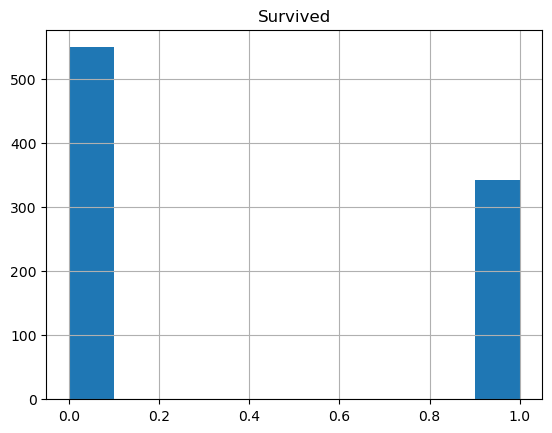

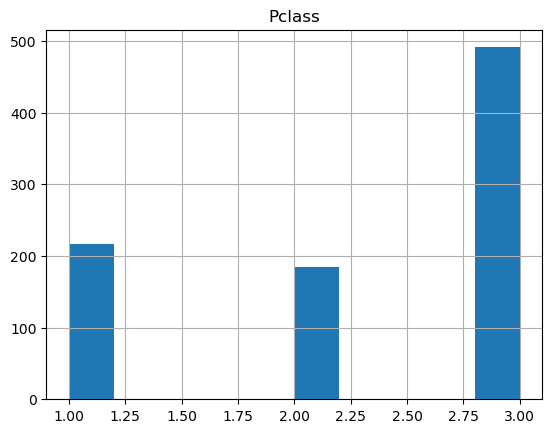

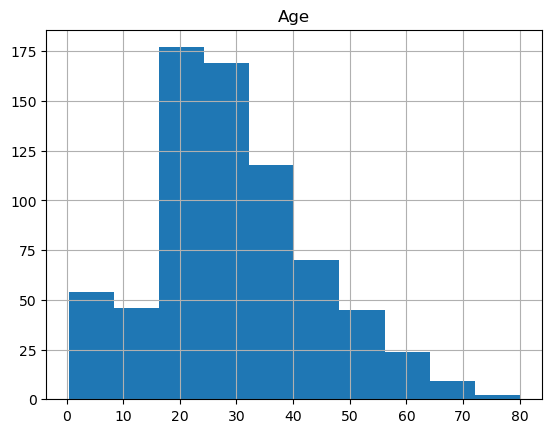

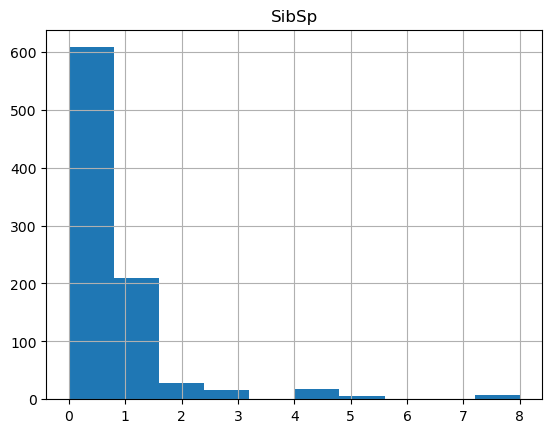

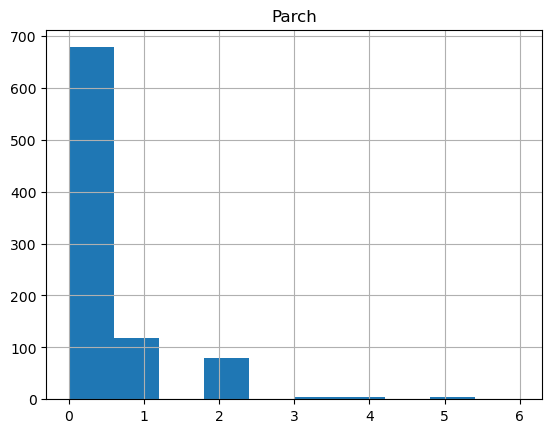

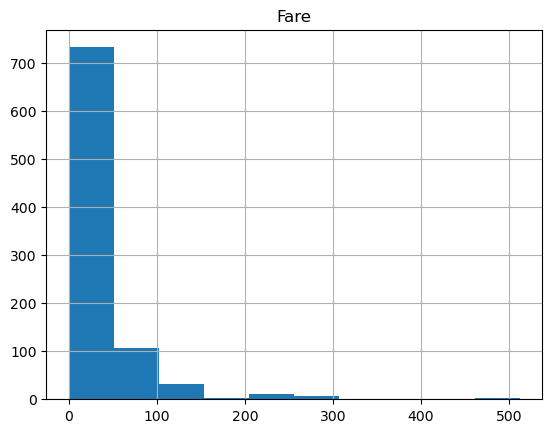

In [159]:
# plot hist and boxplot for each numerical feature
for feature in numerical_features:
    dataset[feature].hist()
    plt.title(feature)
    plt.show()

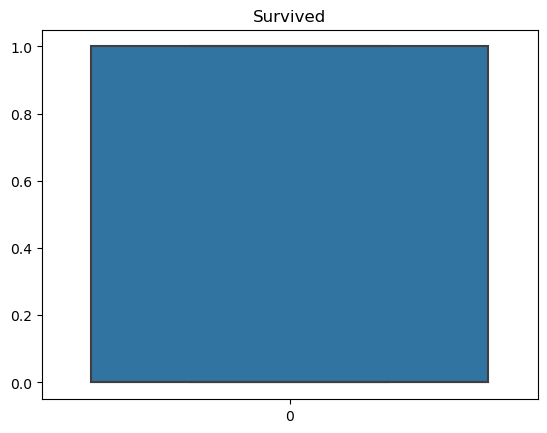

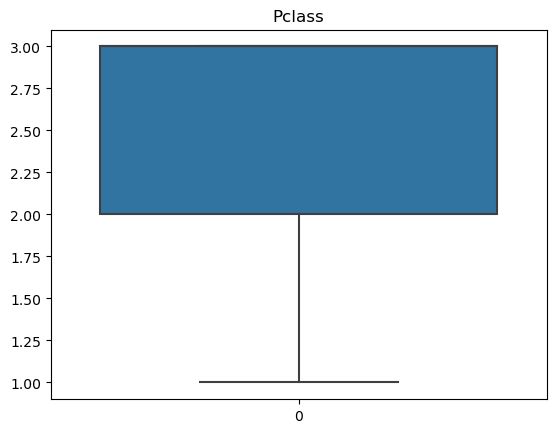

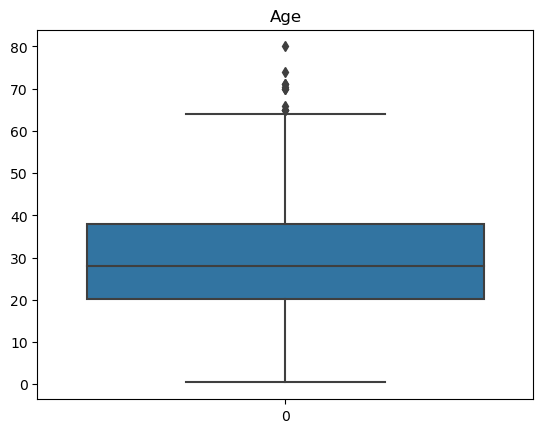

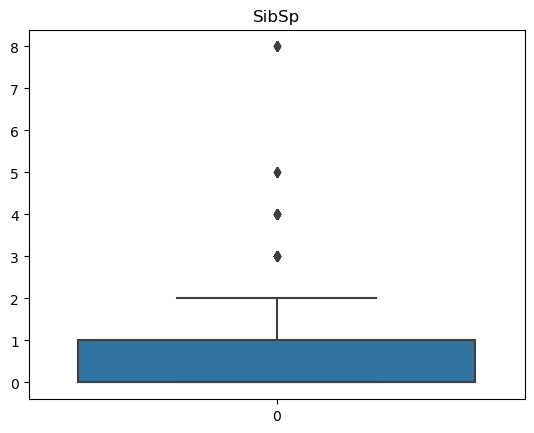

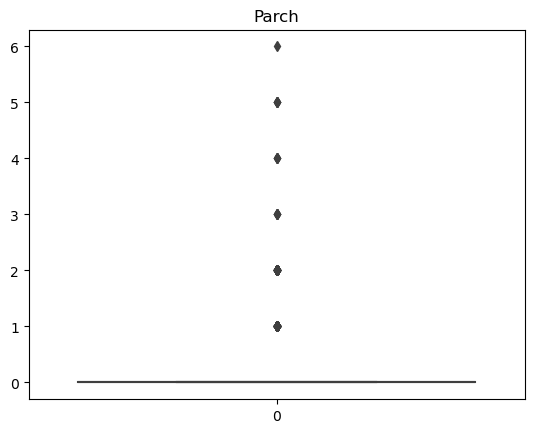

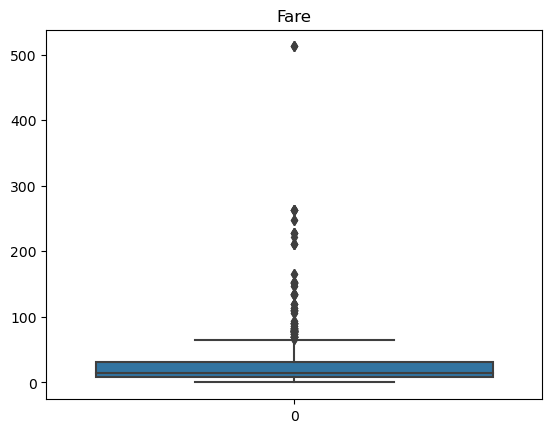

In [160]:
for feature in numerical_features:
    #dataset[feature].plot.box() 
    sns.boxplot(dataset[feature])
    #plt.boxplot(dataset[feature])
    plt.title(feature)
    plt.show()

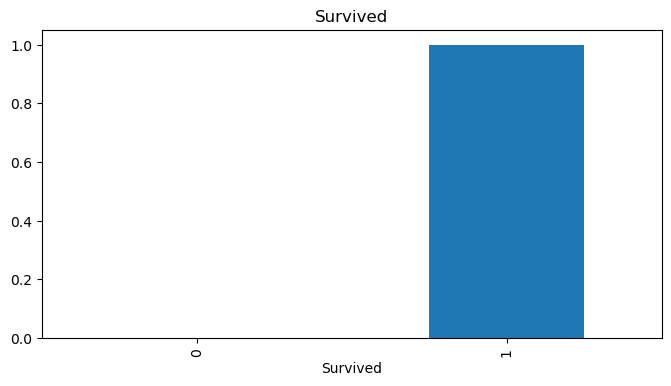

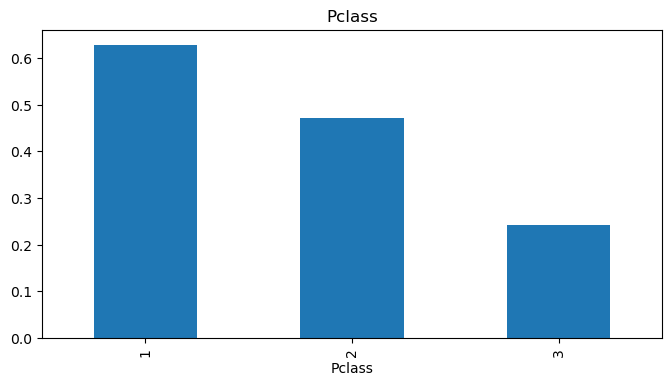

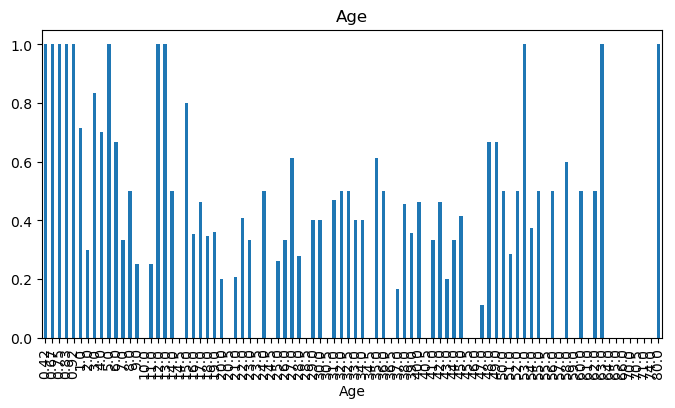

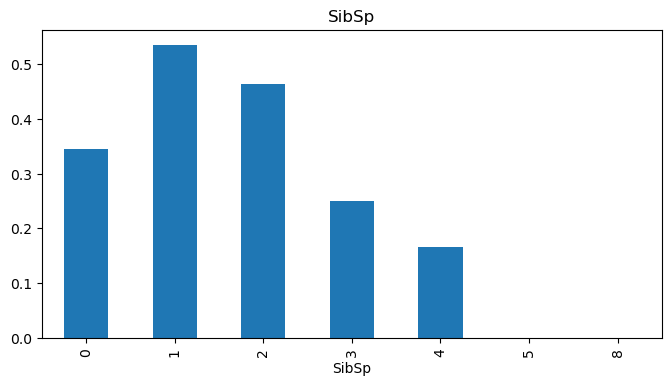

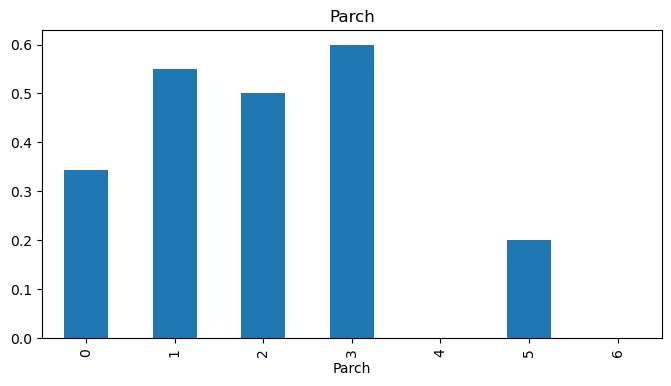

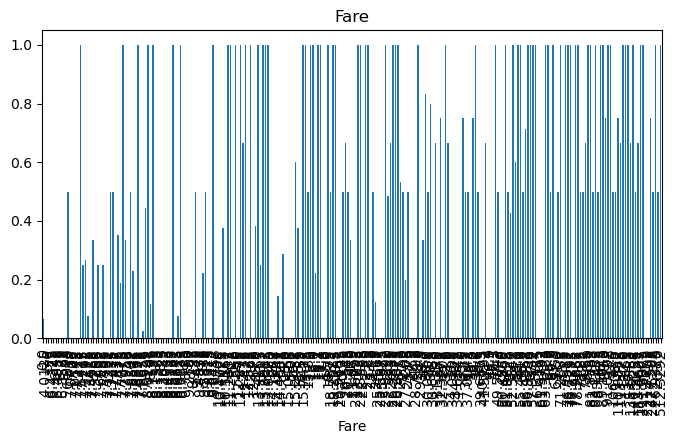

In [161]:
# lets analysis the relationship between numerical features with target variable
for feature in numerical_features:
    plt.figure(figsize = (8, 4))
    dataset.groupby(feature)['Survived'].mean().plot.bar()
    plt.title(feature)
    plt.show()

#### Analyzie the Categorical features

In [162]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [163]:
dataset[categorical_features]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [164]:
dataset[categorical_features].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

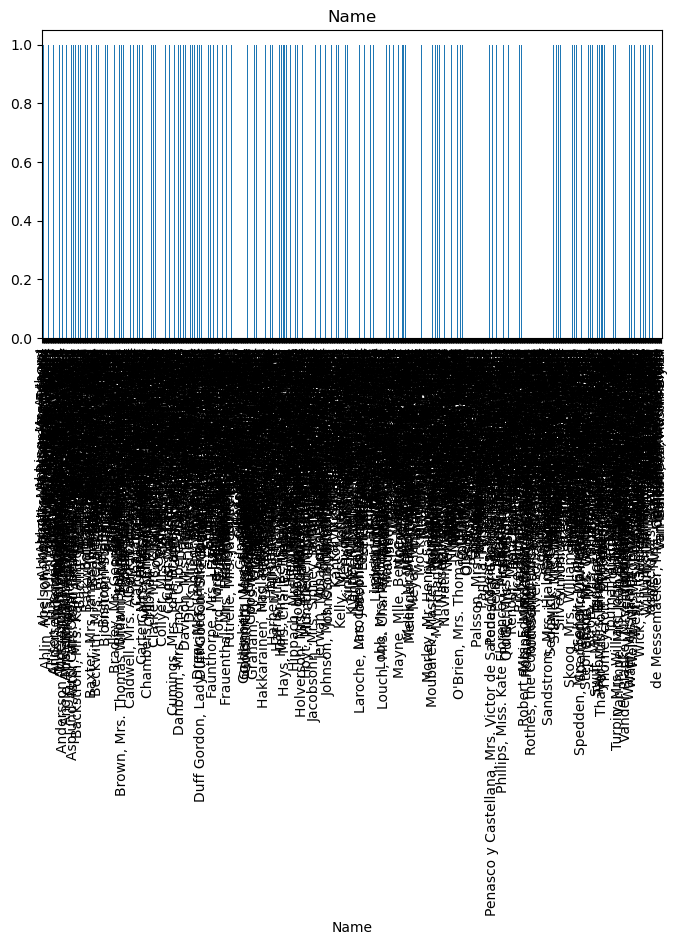

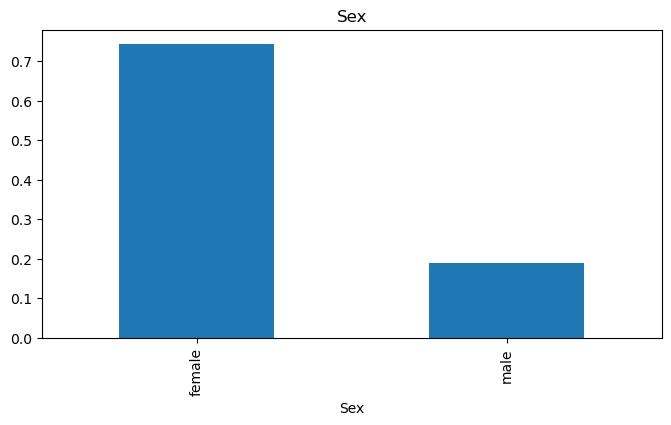

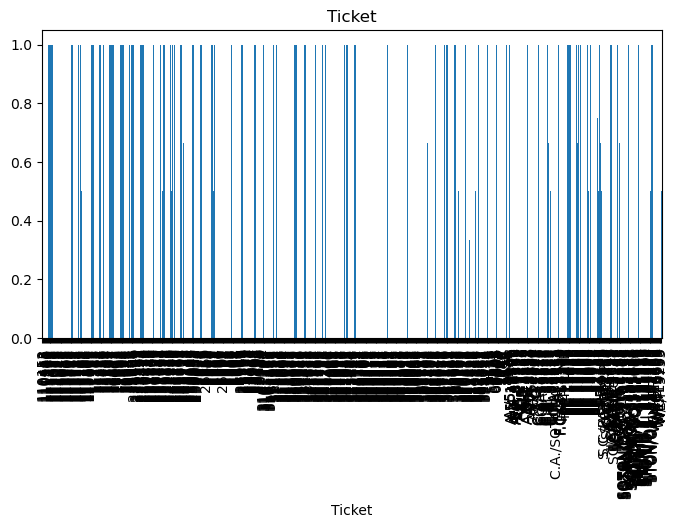

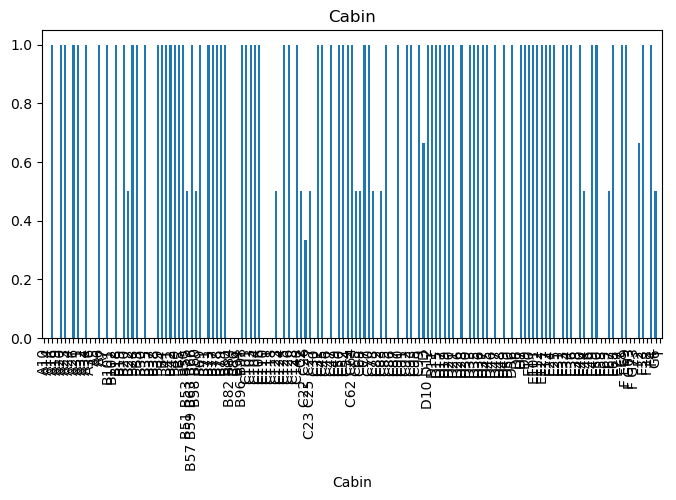

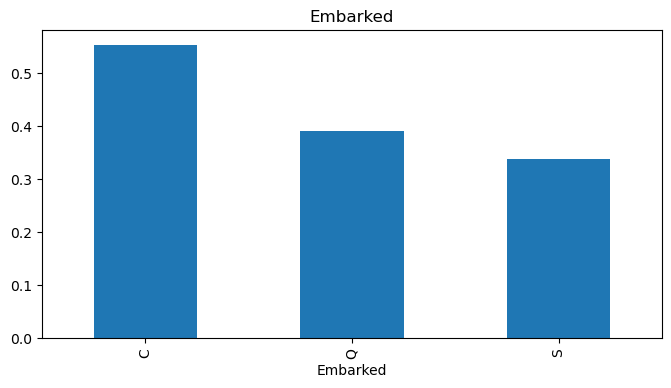

In [165]:
for feature in categorical_features:
    plt.figure(figsize = (8, 4))
    dataset.groupby(feature)['Survived'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [166]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [167]:
# perform label encoding to feature Sex
data_copy = dataset['Sex'].map({'male':1, 'female':0})
data_copy

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [168]:
# perform one-hot encoding to featue sex
data_copy = pd.get_dummies(dataset['Sex'], dtype = int)
data_copy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [169]:
dataset['Sex'] = pd.get_dummies(dataset['Sex'], drop_first = True, dtype = int)
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [179]:
dataset['Sex_encoded'] = pd.get_dummies(dataset['Sex'], drop_first = True, dtype = int)
dataset.drop(['Sex', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_encoded
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1
887,1,1,19.0,0,0,30.0000,S,0
888,0,3,NaN,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


In [172]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [182]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

In [188]:
for feature in dataset['Embarked'].unique():
    dataset[feature + "_encoded"] = pd.get_dummies(dataset['Embarked'])

ValueError: Cannot set a DataFrame with multiple columns to the single column S_encoded

In [190]:
# Use pd.get_dummies to convert the 'Embarked' column into binary (one-hot encoded) columns
embarked_encoded = pd.get_dummies(dataset['Embarked'], prefix='Embarked', drop_first=True)

# Concatenate the one-hot encoded columns with the original dataset
dataset = pd.concat([dataset, embarked_encoded])


dataset


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,S,1.0,False,True
1,1.0,1.0,38.0,1.0,0.0,71.2833,C,0.0,False,False
2,1.0,3.0,26.0,0.0,0.0,7.9250,S,0.0,False,True
3,1.0,1.0,35.0,1.0,0.0,53.1000,S,0.0,False,True
4,0.0,3.0,35.0,0.0,0.0,8.0500,S,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Sex_encoded  891 non-null    float64
 8   Embarked_Q   1782 non-null   bool   
 9   Embarked_S   1782 non-null   bool   
dtypes: bool(2), float64(7), object(1)
memory usage: 128.8+ KB


In [194]:
dataset['Embarked_Q'] = dataset['Embarked_Q'].astype(dtype = int)

In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Sex_encoded  891 non-null    float64
 8   Embarked_Q   1782 non-null   int32  
 9   Embarked_S   1782 non-null   bool   
dtypes: bool(1), float64(7), int32(1), object(1)
memory usage: 134.0+ KB
